In [25]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

## The (College Student) Diet Problem

Consider the canonical college student. After a hard afternoon's work of solving way too many partial differential equations, she emerges from her room to obtain sustenance for the day.

She has a choice between getting chicken over rice (\$5) from the halal cart on her street ($r$), or subs (\$7) from the deli ($s$). She's a poor college student, so she will obviously want to get her money's worth. This is obviously an optimisation problem: she wants to find the amount of chicken over rice and subs she has to buy in order to minimise the total cost she spends on food.

$$
\underset{r,s}{\arg\min} ~ 5r + 7s
$$

In optimisation, we like to call this expression the **objective function**.

Well, it's not as simple as that. A girl's got to get her fill of daily nutrients. Fibre, protein, and carbohydrates are all important, and however far away food pyramids are from the quotidien thoughts of college students, a girl can still dream of a pseudo-healthy diet with at least 4 servings of fibre, 3 servings of protein, and 6 servings of carbohydrates.

A chicken over rice has 2 servings of fibre, 3 servings of protein, and 3 servings of carbohydrates, while a sub has 1 serving of fibre, 3 servings of protein, and 4 servings of carbohydrates. To find the combination of meals that satisfies the daily nutritional requirements, we impose the following **constraints**:

\begin{align}
\text{Fibre: } &2r +  s \geq 4 \\
\text{Protein: } &3r + 3s \geq 3 \\
\text{Carbohydrates: } &3r + 4s \geq 6
\end{align}

### Visualising the Problem

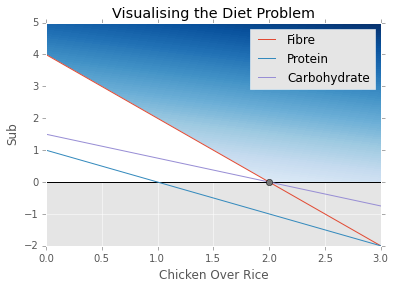

In [26]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)

# define view
r_min = 0.0
r_max = 3.0
s_min = 0.0
s_max = 5.0
res = 100

r = numpy.linspace(r_min, r_max, res)

# plot axes
axes.axhline(0, color='k')
axes.axvline(0, color='k')

# plot constraints
c_1 = lambda x: 4 - 2*x
c_2 = lambda x: 1 - x
c_3 = lambda x: 0.25 * ( 6 - 3*x )
c_1_line = axes.plot( r, c_1(r), label='Fibre' ) # 2r +  s \geq 4
c_2_line = axes.plot( r, c_2(r), label='Protein' ) # 3r + 3s \geq 3
c_3_line = axes.plot( r, c_3(r), label='Carbohydrate' ) # 3r + 4s \geq 6

# plot objective
s = numpy.linspace(s_min, s_max, res)
c = numpy.empty([r.size, s.size])
for i, r_i in enumerate(r):
    c[:,i] = 5 * r_i + 12 * s

axes.contourf(r, s, c, res, cmap='Blues')
r_cut = numpy.linspace(0.0, 2.0, 100)
axes.fill_between(r_cut, c_1(r_cut), color='w')

# plot cost minimising point
axes.plot(2.0, 0, 'o')

# label graph
axes.set_title('Visualising the Diet Problem')
axes.set_xlabel('Chicken Over Rice')
axes.set_ylabel('Sub')
axes.legend()

plt.show()

We can visualise our diet problem on a graph of "Number of Subs vs. Number of Chicken or Rice", where lines each represent a constraint, and our cost function can be represented in shades of blue: the deeper the blue, the more we will spend on meals.

The regions where we will satisfy our constraints will be the regions _above_ our constraint lines, since we want more than or equal to the number of minimum servings. Obviously, we can't buy a negative number of subs or chicken over rice, so we have the implicit constraints that $r>0$ and $s>0$.

The intersection of all the regions that satisfy each of our constraints is what we call the **feasible region**, or the **feasible set**, the region where solutions that satisfy all constraints. In the graph, this is the region with the blue gradient fill.

So our problem of deciding how much of what food to buy has been essentially reduced to finding the point in the feasible set with the minimum cost (i.e. the lightest shade of blue.) With one glance, we can tell that this point is $(0, 2)$, so we should buy 2 chicken over rice, and 0 subs. Interestingly, our feasible region is determined largely by the fibre constraint—read from this what you want.

Well, you think to yourself, that was easy; I can stop reading now!

That's true, if you only have 2 foods to choose between. But in general, life isn't as simple as this; if, say, you're a functioning adult and actually cook, you'll want to choose between the 1000's of grocery items available to you at the local supermarket. In that case, you'll have to draw out one axis for each food item (how you'll do that, I don't know), and then compare the colors across this unvisualisable space. This shit gets real, and fast.

## The Simplex Method

Well, luckily for us, 